In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob
plt.rcParams["figure.figsize"] = (15,10)

# Angle

In [2]:
fnames_angle = glob('./analysis_data/angle/out*_angle.txt')
fnames_z = glob('./analysis_data/z/out*_z.txt')
arrays_angle = [np.loadtxt(f) for f in fnames_angle]
arrays_z = [np.loadtxt(f) for f in fnames_z]
final_array_angle = np.concatenate(arrays_angle)
final_array_z = np.concatenate(arrays_z)

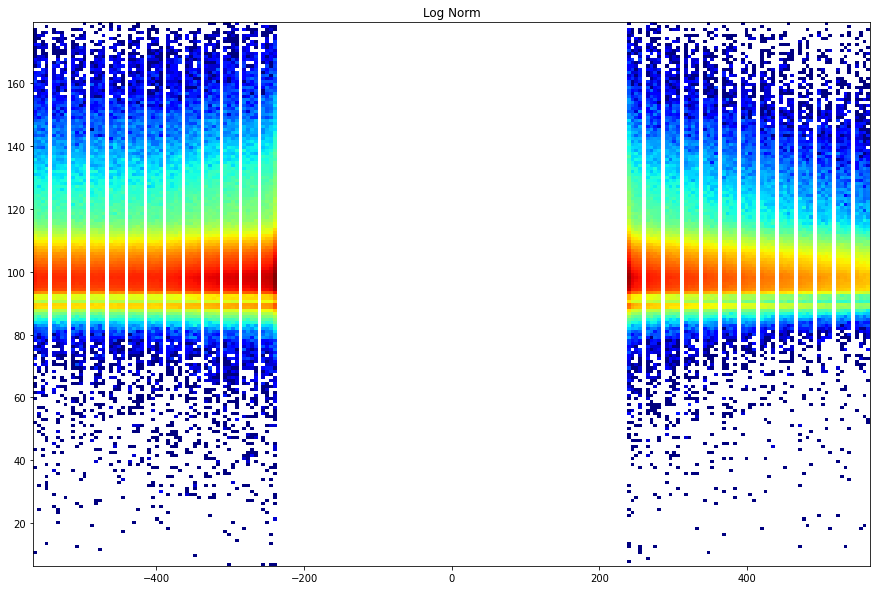

In [3]:
angle_deg = final_array_angle/(2*np.pi)*360
plt.hist2d(final_array_z, angle_deg, bins=(220, 180), cmap=plt.cm.jet, norm = mpl.colors.LogNorm())#, interpolation="nearest")
plt.title("Log Norm")
plt.savefig("TileHitAngleColorMapLogNorm", dpi=600)
plt.show()

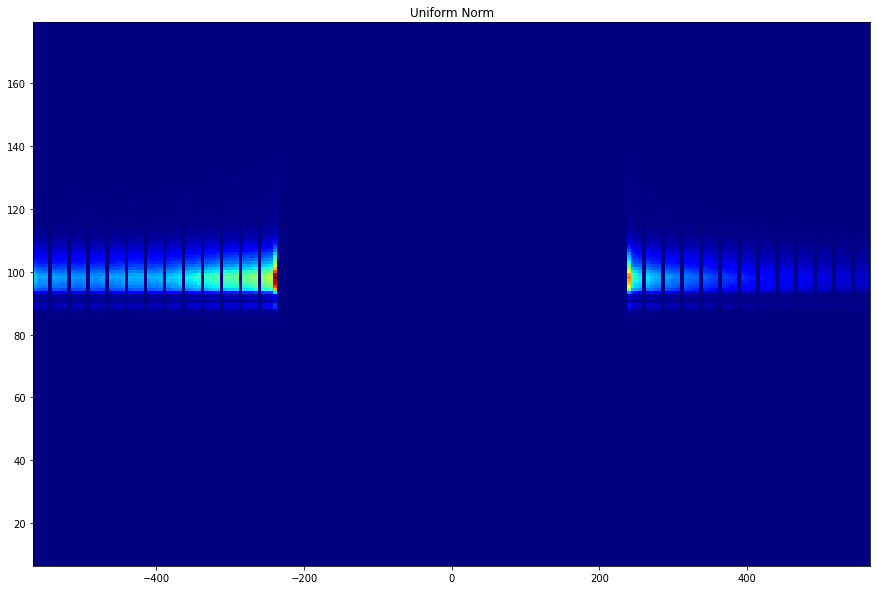

In [4]:
plt.hist2d(final_array_z, angle_deg, bins=(220, 180), cmap=plt.cm.jet)#, interpolation="nearest")
plt.title("Uniform Norm")
plt.savefig("TileHitAngleColorMap", dpi=600)
plt.show()

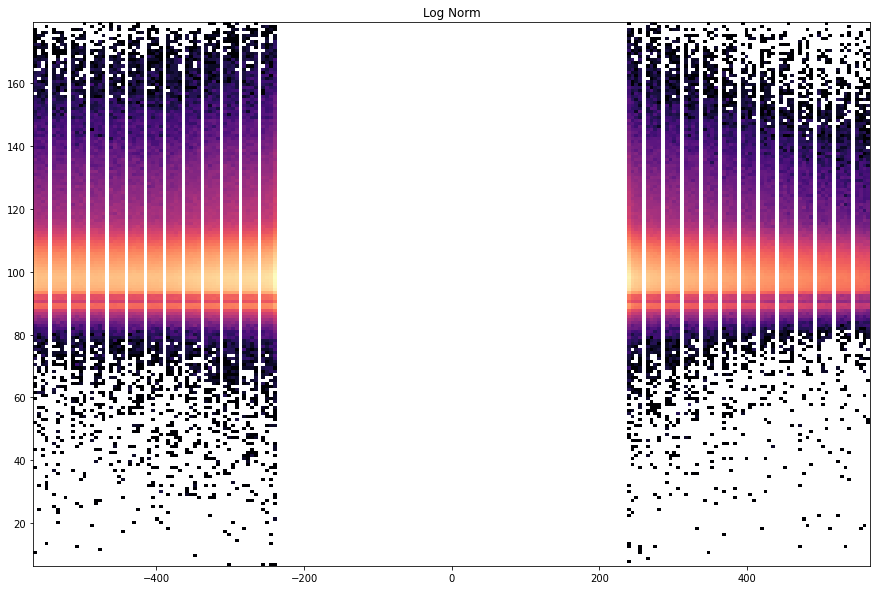

In [5]:
plt.hist2d(final_array_z, angle_deg, bins=(220, 180), cmap="magma", norm = mpl.colors.LogNorm())#, interpolation="nearest")
plt.title("Log Norm")
plt.show()

# Rate

In [6]:
fnames_rate = glob('./analysis_data/rate/out*.npz')
fnames_edep = glob('./analysis_data/edep/out*edep.npz')

arrays_rate = [np.load(f, allow_pickle=True) for f in fnames_rate]
arrays_edep = [np.load(f, allow_pickle=True) for f in fnames_edep]

print(sorted(arrays_rate[1].files))

final_array_rate_total = np.concatenate([arrays_rate[i]["total"] for i in range(len(arrays_rate))])
final_array_rate_primary = np.concatenate([arrays_rate[i]["primary"] for i in range(len(arrays_rate))])
final_array_rate_secondary = np.concatenate([arrays_rate[i]["secondary"] for i in range(len(arrays_rate))])
final_array_rate_tertiary = np.concatenate([arrays_rate[i]["tertiary"] for i in range(len(arrays_rate))])

final_array_edep_total = np.concatenate([arrays_edep[i]["total"] for i in range(len(arrays_edep))])
final_array_edep_primary = np.concatenate([arrays_edep[i]["primary"] for i in range(len(arrays_edep))])
final_array_edep_secondary = np.concatenate([arrays_edep[i]["secondary"] for i in range(len(arrays_edep))])
final_array_edep_tertiary = np.concatenate([arrays_edep[i]["tertiary"] for i in range(len(arrays_edep))])

#arrays_edep = [np.loadtxt(f) for f in fnames_z]
#final_array_edep = np.concatenate(arrays_z)


['primary', 'secondary', 'tertiary', 'total']


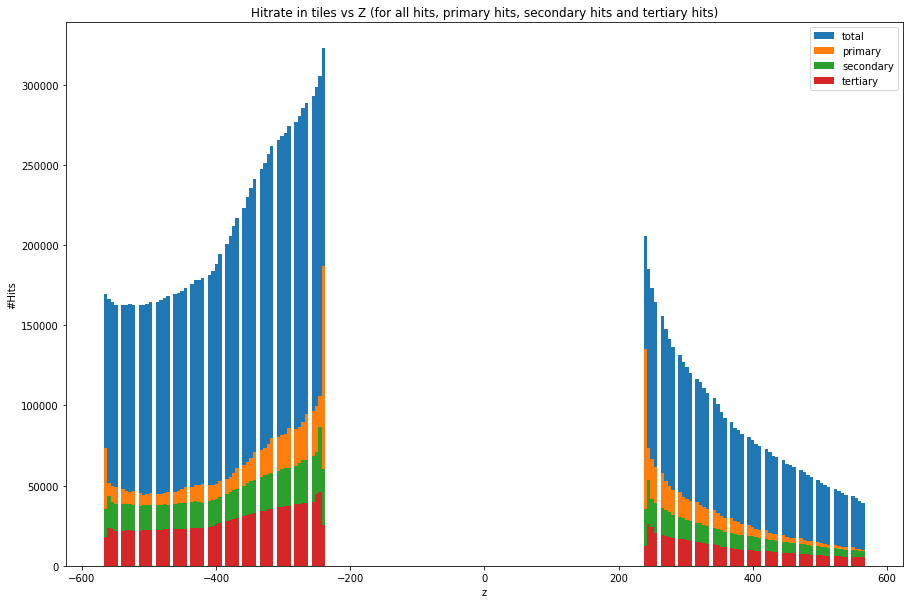

In [7]:
plt.hist(final_array_rate_total, bins=220, histtype="stepfilled", label="total")
plt.hist(final_array_rate_primary, bins=220, histtype="stepfilled", label="primary")
plt.hist(final_array_rate_secondary, bins=220, histtype="stepfilled", label="secondary")
plt.hist(final_array_rate_tertiary, bins=220, histtype="stepfilled", label="tertiary")
plt.legend()
plt.title("Hitrate in tiles vs Z (for all hits, primary hits, secondary hits and tertiary hits)")
plt.xlabel("z")
plt.ylabel("#Hits")
plt.savefig("TileHitRateHID", dpi=600)
plt.show()


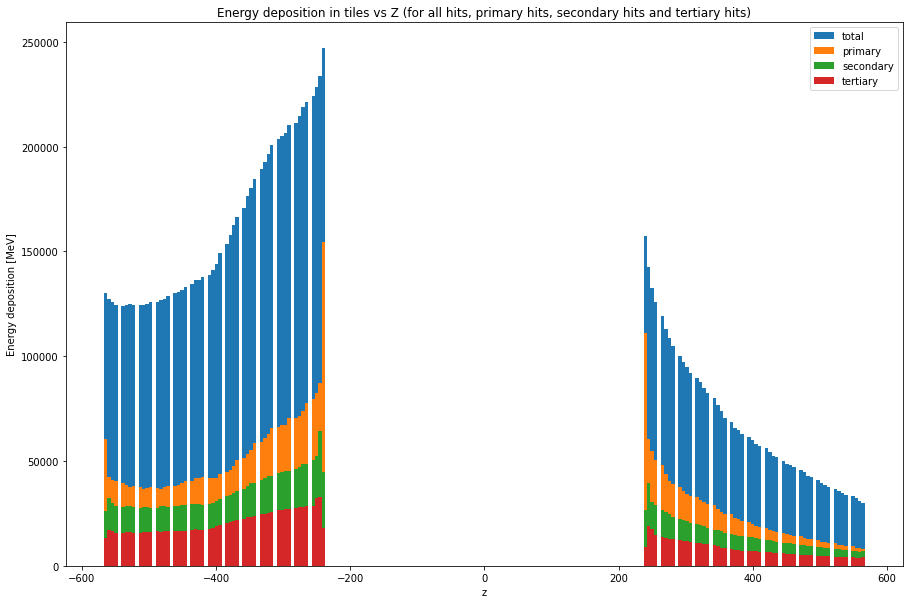

In [8]:
plt.hist(final_array_rate_total,weights = final_array_edep_total, bins=220, histtype="stepfilled", label="total")
plt.hist(final_array_rate_primary,weights = final_array_edep_primary, bins=220, histtype="stepfilled", label="primary")
plt.hist(final_array_rate_secondary,weights = final_array_edep_secondary, bins=220, histtype="stepfilled", label="secondary")
plt.hist(final_array_rate_tertiary,weights = final_array_edep_tertiary, bins=220, histtype="stepfilled", label="tertiary")
plt.legend()
plt.title("Energy deposition in tiles vs Z (for all hits, primary hits, secondary hits and tertiary hits)")
plt.xlabel("z")
plt.ylabel("Energy deposition [MeV]")
plt.savefig("TileHitEdepHID", dpi=600)
plt.show()